# Heat Map

In [10]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size': 5})
# from util import imputation_err_heatmap

In [11]:
# original_filepath = './outputs/13.Zeisel/original_top_expression.csv'
# imputed_filepath = './outputs/13.Zeisel/imputed.csv'
# label_filepath = './outputs/13.Zeisel/labels.csv'

original_filepath = 'outputs/datasets/2.Chu/original_top_expression.csv'
imputed_filepath = 'outputs/inputs/no_bulk_2.Chu_0.1_dropout/imputed.csv'
label_filepath = 'outputs/inputs/no_bulk_2.Chu_0.1_dropout/labels.csv'

original = pd.read_csv(original_filepath, index_col=0, sep=None).to_numpy()
imputed = pd.read_csv(imputed_filepath, index_col=0, sep=None).to_numpy()
label = pd.read_csv(label_filepath, index_col=0, sep=None).to_numpy()

original = np.log(original + 1)
imputed = imputed.T
label = label.ravel()

print(original.shape)
print(imputed.shape)
print(label.shape)

/Users/edisongu/Documents/GitHub/scGNN2.0/scgnn-env/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.



(2000, 1018)
(2000, 1018)
(1018,)


10
Median L1 Error is: 1.4628097426088709


/var/folders/43/9fmj5rss65502wsgp604yfrw0000gn/T/ipykernel_76994/4265215868.py:11: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



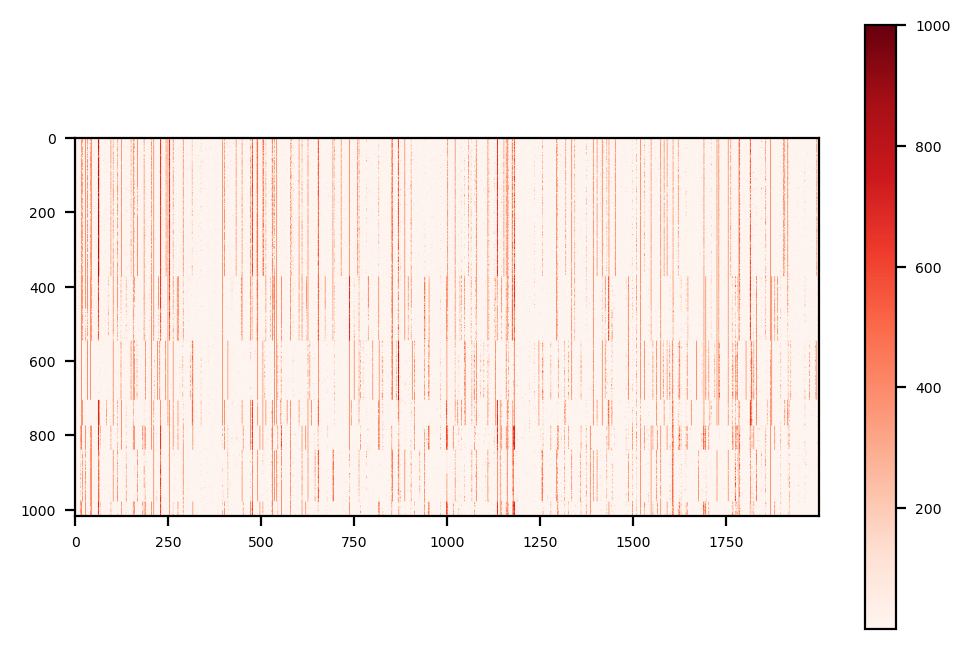

In [12]:
diff = 1/(np.abs(original - imputed).T+1e-3)

ct_count = len(set(label))
diff_list = [[] for i in range(ct_count)]
for i, ct in enumerate(label):
    diff_list[ct].append(diff[i])

print(ct_count)

size_idx = np.argsort([len(np.vstack(ct)) for ct in diff_list])[::-1]
diff = np.vstack(np.array([np.vstack(ct) for ct in diff_list])[size_idx])

print(f'Median L1 Error is: {np.median(np.abs(diff))}')

plt.imshow(diff, cmap='Reds')
plt.colorbar()
plt.savefig(os.path.join('./outputs', f"imputation_error_heatmap_Chu_no_bulk.png"), dpi=1000)
plt.show()

In [34]:
from IPython.display import display
import os

import numpy as np
import pandas as pd

from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size': 5})
# from util import imputation_err_heatmap

In [ ]:
def set_list(list):
    tmp = list
    list.append('D')
    print(tmp)
    list = ["A", "B", "C"]
    print(list)
    # print(tmp)
    # print(list)
    return tmp
  
def add(list):
    list.append("D")
    return list
  
my_list = ["E"]
  
print(set_list(my_list))
  
print(add(my_list))

In [ ]:
from IPython.display import display
from util import generateCelltypeRegu as gen

def normalize_cell_cell_matrix(x):
    avg_factor = 1 / np.ma.sum(x, axis=1).reshape((x.shape[0],-1))
    display(pd.DataFrame(avg_factor))
    avg_factor = np.ma.filled(avg_factor, fill_value=0)
    display(pd.DataFrame(avg_factor))
    avg_mtx = np.tile(avg_factor, [1, len(x)])
    display(pd.DataFrame(avg_mtx))
    return avg_mtx * x

# def normalize_cell_cell_matrix(x):
#     avg_factor = 1 / np.ma.sum(x, axis=1, keepdims=True)
#     avg_factor = np.ma.filled(avg_factor, fill_value=0)
#     avg_mtx = np.tile(avg_factor, [1, len(x)])
#     return avg_mtx * x

x = gen([1,1,2,1,2,3])
n = normalize_cell_cell_matrix(x)

display(pd.DataFrame(x, dtype=int))
display(pd.DataFrame(n))

# display(pd.DataFrame(x[[0,1,3]][:,[0,1,3]], dtype=int))

In [ ]:
np.random.seed(2)
a = np.random.random((5,5))
display(a)

b = gen([1,1,2,1,2])
display(b)

display(b @ a)


In [ ]:
def normalize_cell_cell_matrix(x):
    avg_factor = 1 / np.ma.sum(x, axis=1).reshape((x.shape[0],-1))
    display(pd.DataFrame(avg_factor))
    avg_factor = np.ma.filled(avg_factor, fill_value=0)
    display(pd.DataFrame(avg_factor))
    avg_mtx = np.tile(avg_factor, [1, len(x)])
    display(pd.DataFrame(avg_mtx))
    return avg_mtx * x

np.random.seed(2)
a = np.random.random((4,5))
display(a)
print(a.sum())
b = (np.random.random((4,4))>0.5).astype(int)
display(b)
print((b@a).sum())
b = normalize_cell_cell_matrix(b)
display(b)
display(b @ a)
print((b@a).sum())

# GRAPH

In [357]:
%autoreload 2
import numpy as np
import auto_encoders.graph_AE as gae
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
np.random.seed(2020)
plt.rcParams['figure.dpi'] = 150

<function matplotlib.pyplot.show(close=None, block=None)>

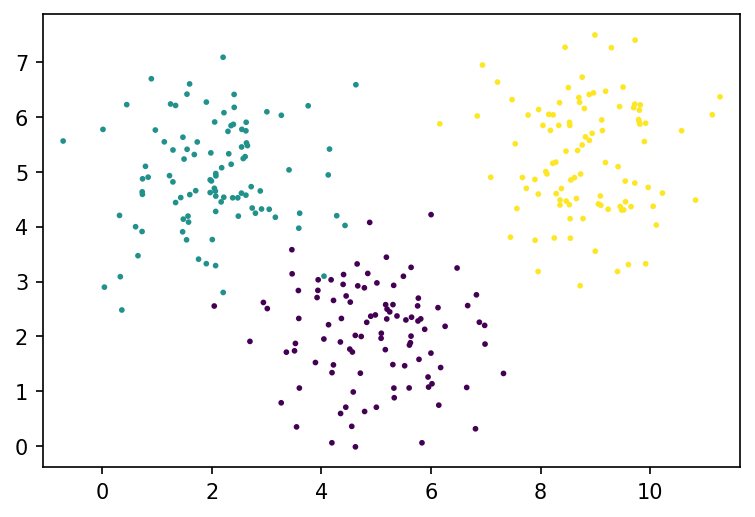

In [369]:
np.random.seed(2022)
# feature = np.random.random((100,2))

N = 300
data1 = np.random.randn(N//3,2) + np.array([2,5])
data2 = np.random.randn(N//3,2) + np.array([5,2])
data3 = np.random.randn(N//3,2) + np.array([5,9])
feature = np.concatenate((data1, data2, data3))
feature = feature[:,::-1]
feature_saved = feature
c_label = [ct for ct in range(3) for i in range(N//3)]
c_label_saved = c_label
plt.scatter(feature[:,0],feature[:,1], s=3, c=c_label)
plt.axis('equal')
plt.show

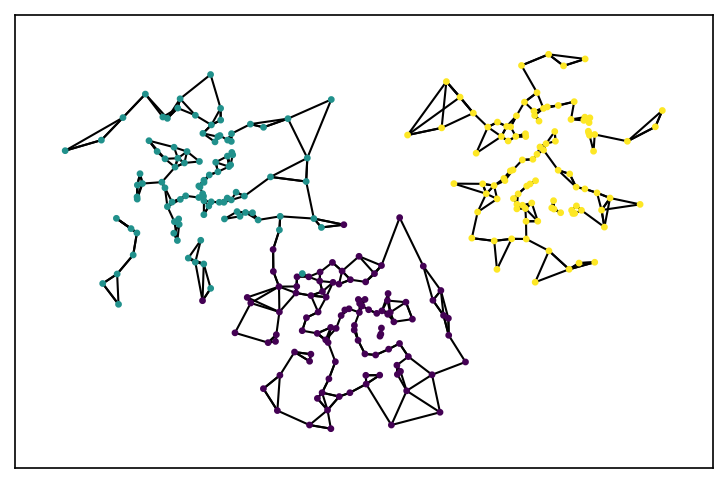

In [370]:
edgescale, neighbour = 1, 3

edge_list = gae.v0_calculateKNNgraphDistanceMatrixStatsSingleThread(feature, k=neighbour)

G = nx.DiGraph()
G.add_weighted_edges_from(edge_list)

attr = {i:f for i,f in enumerate(feature)}
nx.set_node_attributes(G, attr, 'feature')
edgewidth = [G.get_edge_data(u, v)['weight']*edgescale for u, v in G.edges()]
pos = nx.get_node_attributes(G,"feature")
# nodesize = [np.linalg.norm(pos[n])*200 for n in G.nodes()]
nodecolor = [c_label[n] for n in G.nodes()]

nx.draw_networkx(G, pos=pos, width=edgewidth, with_labels=False, arrows=False, node_size=5, node_color=nodecolor, connectionstyle="arc3,rad=0.1")
plt.axis('equal')
plt.show()

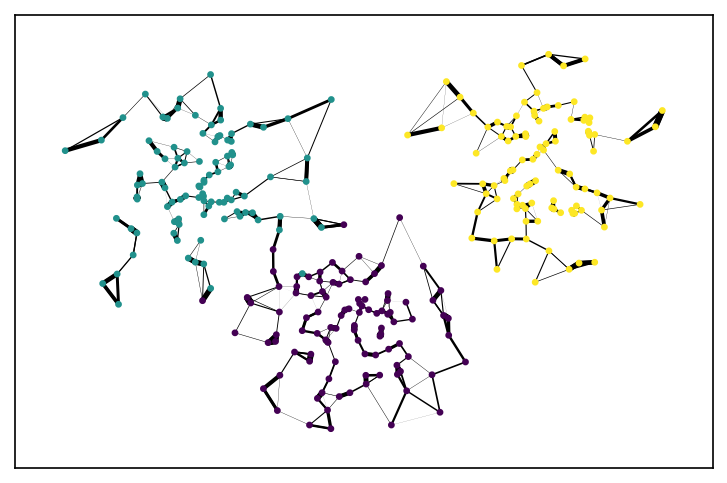

In [371]:
edgescale, neighbour = 4, 3

edge_list = gae.v1_calculateKNNgraphDistanceMatrixStatsSingleThread(feature, k=neighbour)

G = nx.DiGraph()
G.add_weighted_edges_from(edge_list)

attr = {i:f for i,f in enumerate(feature)}
nx.set_node_attributes(G, attr, 'feature')
edgewidth = [G.get_edge_data(u, v)['weight']*edgescale for u, v in G.edges()]
pos = nx.get_node_attributes(G,"feature")
# nodesize = [np.linalg.norm(pos[n])*200 for n in G.nodes()]
nodecolor = [c_label[n] for n in G.nodes()]

nx.draw_networkx(G, pos=pos, width=edgewidth, with_labels=False, arrows=False, node_size=5, node_color=nodecolor, connectionstyle="arc3,rad=0.1")
plt.axis('equal')
plt.show()

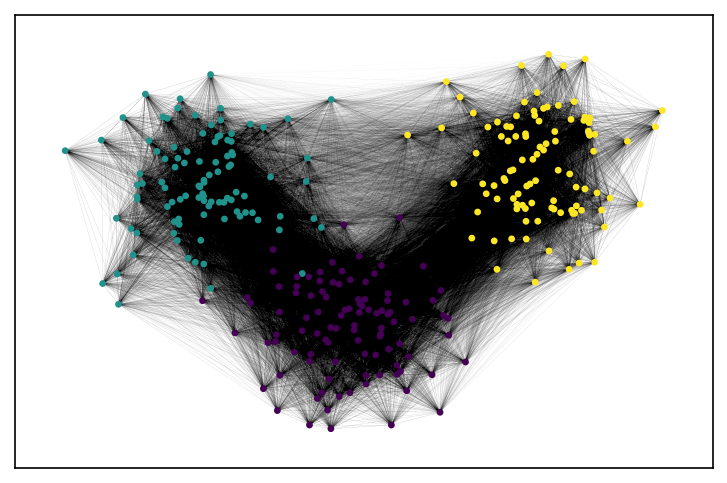

In [372]:
edgescale, neighbour = 0.02, feature.shape[0]-1

edge_list = gae.v1_calculateKNNgraphDistanceMatrixStatsSingleThread(feature, k=neighbour)

G = nx.DiGraph()
G.add_weighted_edges_from(edge_list)

attr = {i:f for i,f in enumerate(feature)}
nx.set_node_attributes(G, attr, 'feature')
edgewidth = [G.get_edge_data(u, v)['weight']*edgescale for u, v in G.edges()]
pos = nx.get_node_attributes(G,"feature")
# nodesize = [np.linalg.norm(pos[n])*200 for n in G.nodes()]
nodecolor = [c_label[n] for n in G.nodes()]

nx.draw_networkx(G, pos=pos, width=edgewidth, with_labels=False, arrows=False, node_size=5, node_color=nodecolor, connectionstyle="arc3,rad=0.1")
plt.axis('equal')
plt.show()

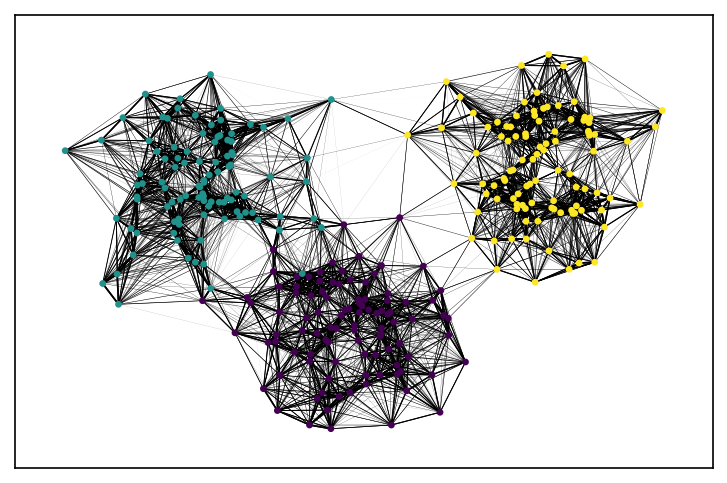

In [373]:
edgescale, neighbour = 1, int(feature.shape[0]*0.1)

edge_list = gae.v1_calculateKNNgraphDistanceMatrixStatsSingleThread(feature, k=neighbour)

G = nx.DiGraph()
G.add_weighted_edges_from(edge_list)

attr = {i:f for i,f in enumerate(feature)}
nx.set_node_attributes(G, attr, 'feature')
edgewidth = [G.get_edge_data(u, v)['weight']*edgescale for u, v in G.edges()]
pos = nx.get_node_attributes(G,"feature")
# nodesize = [np.linalg.norm(pos[n])*200 for n in G.nodes()]
nodecolor = [c_label[n] for n in G.nodes()]

nx.draw_networkx(G, pos=pos, width=edgewidth, with_labels=False, arrows=False, node_size=5, node_color=nodecolor, connectionstyle="arc3,rad=0.1")
plt.axis('equal')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

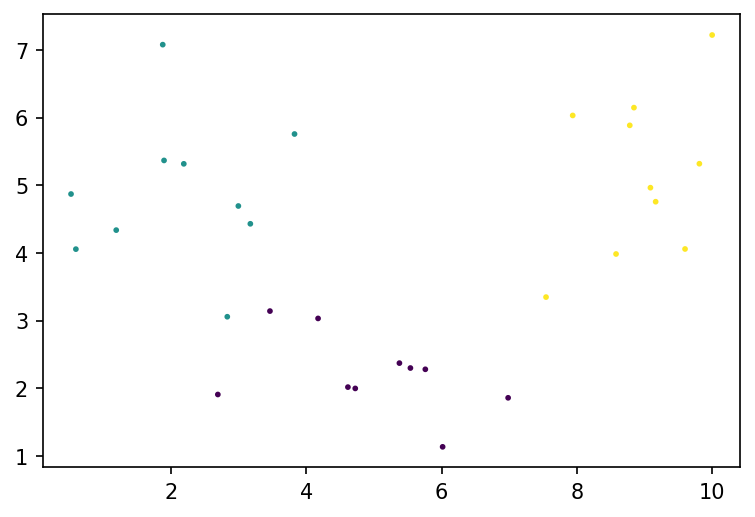

In [374]:
np.random.seed(2022)
# feature = np.random.random((100,2))

N = 30
data1 = np.random.randn(N//3,2) + np.array([2,5])
data2 = np.random.randn(N//3,2) + np.array([5,2])
data3 = np.random.randn(N//3,2) + np.array([5,9])
feature = np.concatenate((data1, data2, data3))
feature = feature[:,::-1]
c_label = [ct for ct in range(3) for i in range(N//3)]

plt.scatter(feature[:,0],feature[:,1], s=3, c=c_label)
plt.axis('equal')
plt.show

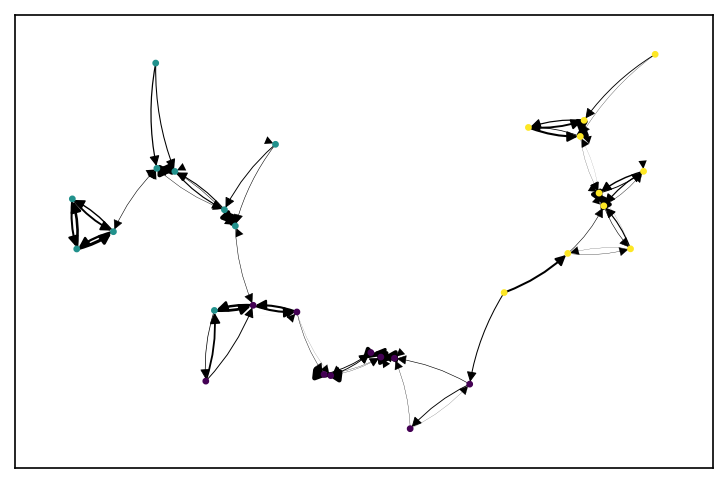

In [375]:
edgescale, neighbour = 2.5, int(feature.shape[0]*0.1)

edge_list = gae.v1_calculateKNNgraphDistanceMatrixStatsSingleThread(feature, k=neighbour)

G = nx.DiGraph()
G.add_weighted_edges_from(edge_list)

attr = {i:f for i,f in enumerate(feature)}
nx.set_node_attributes(G, attr, 'feature')
edgewidth = [G.get_edge_data(u, v)['weight']*edgescale for u, v in G.edges()]
pos = nx.get_node_attributes(G,"feature")
# nodesize = [np.linalg.norm(pos[n])*200 for n in G.nodes()]
nodecolor = [c_label[n] for n in G.nodes()]

nx.draw_networkx(G, pos=pos, width=edgewidth, with_labels=False, arrows=True, node_size=5, node_color=nodecolor, connectionstyle="arc3,rad=0.1")
plt.axis('equal')
plt.show()

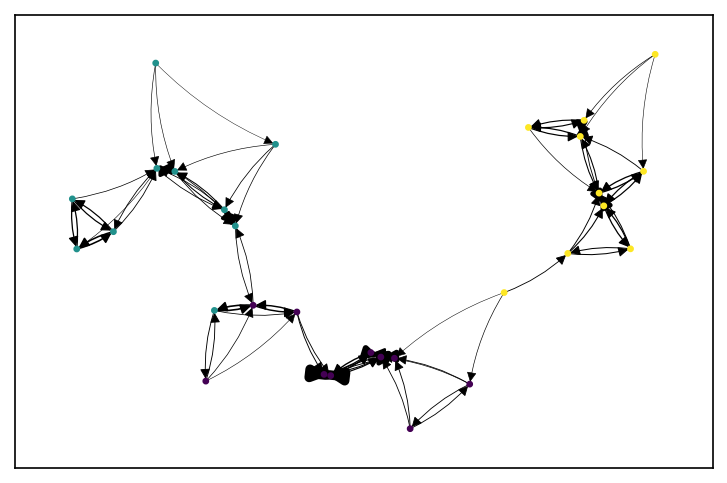

In [376]:
edgescale, neighbour = 0.5, int(feature.shape[0]*0.1)

edge_list = gae.v2_calculateKNNgraphDistanceMatrixStatsSingleThread(feature, k=neighbour)

G = nx.DiGraph()
G.add_weighted_edges_from(edge_list)

attr = {i:f for i,f in enumerate(feature)}
nx.set_node_attributes(G, attr, 'feature')
edgewidth = [G.get_edge_data(u, v)['weight']*edgescale for u, v in G.edges()]
pos = nx.get_node_attributes(G,"feature")
# nodesize = [np.linalg.norm(pos[n])*200 for n in G.nodes()]
nodecolor = [c_label[n] for n in G.nodes()]

nx.draw_networkx(G, pos=pos, width=edgewidth, with_labels=False, arrows=True, node_size=5, node_color=nodecolor, connectionstyle="arc3,rad=0.1")
plt.axis('equal')
plt.show()

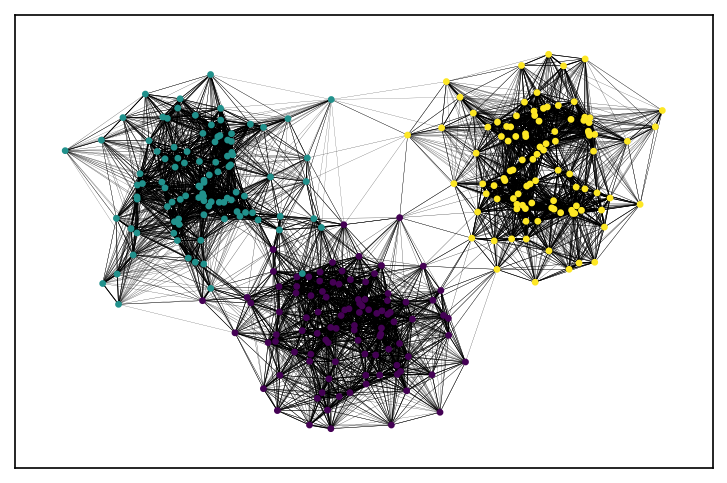

In [379]:
feature = feature_saved
c_label= c_label_saved 
edgescale, neighbour = 0.2, int(feature.shape[0]*0.1)

edge_list = gae.v2_calculateKNNgraphDistanceMatrixStatsSingleThread(feature, k=neighbour)

G = nx.DiGraph()
G.add_weighted_edges_from(edge_list)

attr = {i:f for i,f in enumerate(feature)}
nx.set_node_attributes(G, attr, 'feature')
edgewidth = [G.get_edge_data(u, v)['weight']*edgescale for u, v in G.edges()]
pos = nx.get_node_attributes(G,"feature")
# nodesize = [np.linalg.norm(pos[n])*200 for n in G.nodes()]
nodecolor = [c_label[n] for n in G.nodes()]

nx.draw_networkx(G, pos=pos, width=edgewidth, with_labels=False, arrows=0, node_size=5, node_color=nodecolor, connectionstyle="arc3,rad=0.1")
plt.axis('equal')
plt.show()

# Cell Cell Graph

In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd

import auto_encoders.graph_AE as gae
import util

import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
import os

import umap

%matplotlib inline
np.random.seed(2020)
plt.rcParams['figure.dpi'] = 150

In [6]:
data = '2.Chu'

path = f"outputs/inputs/bulk_2.Chu_0.1_dropout/"
true_label_path = f'outputs/datasets/{data}/top_cell_labels.csv'

edgelist_path = path+"graph_edgeList.csv"
edge_list = np.genfromtxt(edgelist_path, delimiter=',',skip_header=1)[:,1:]
edge_list = [[int(start), int(end), weight] for start, end, weight in edge_list]
print(edge_list[:5])

label_path = path+"labels.csv"
c_label = np.genfromtxt(label_path, delimiter=',',skip_header=1, dtype=int)[:,1:].reshape(-1)
print(c_label.shape)

true_label = np.genfromtxt(true_label_path, delimiter=',',skip_header=1, dtype=int)[:,1:].reshape(-1)
print(true_label.shape)

embed_path = path+"graph_embedding.csv"
z = np.genfromtxt(embed_path, delimiter=',', skip_header=1)[:,1:]
print(z.shape)

[[0, 4, 0.9729666960438891], [0, 35, 0.9242567083029163], [0, 48, 0.8761494279677176], [0, 135, 0.7488776470345129], [0, 137, 0.7181266603716513]]
(1018,)
(1018,)
(1018, 16)


<AxesSubplot:ylabel='Density'>

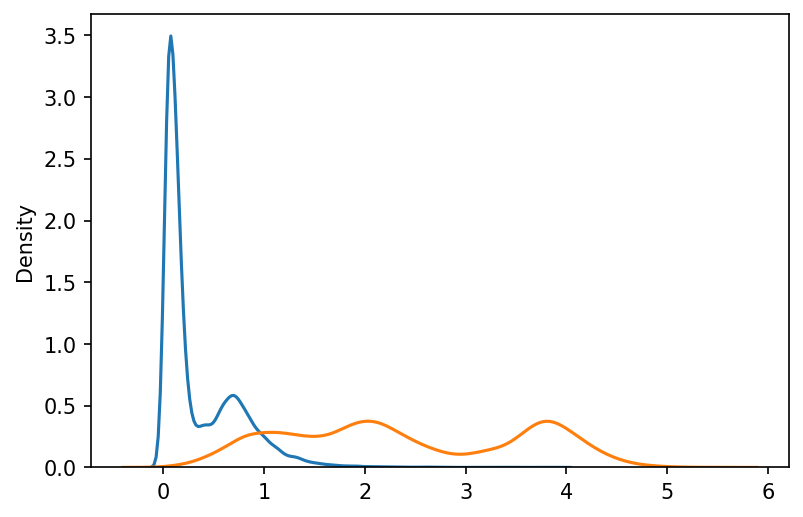

In [7]:
G = nx.DiGraph()
G.add_weighted_edges_from(edge_list)

# attr = {i:f for i,f in enumerate(feature)}
# nx.set_node_attributes(G, attr, 'feature')
edgewidth = [G.get_edge_data(u, v)['weight'] for u, v in G.edges()]
pos = nx.get_node_attributes(G,"feature")
# nodesize = [np.linalg.norm(pos[n])*200 for n in G.nodes()]
nodecolor = [c_label[n] for n in G.nodes()]

reducer = umap.UMAP(random_state=2021)
embedding = reducer.fit_transform(z)
pos = {n: embedding[n] for n in G.nodes()}

sns.kdeplot(edgewidth)
edgewidth_log = np.log(edgewidth)
edgewidth_log = edgewidth_log + np.abs(min(edgewidth_log))
sns.kdeplot(edgewidth_log)

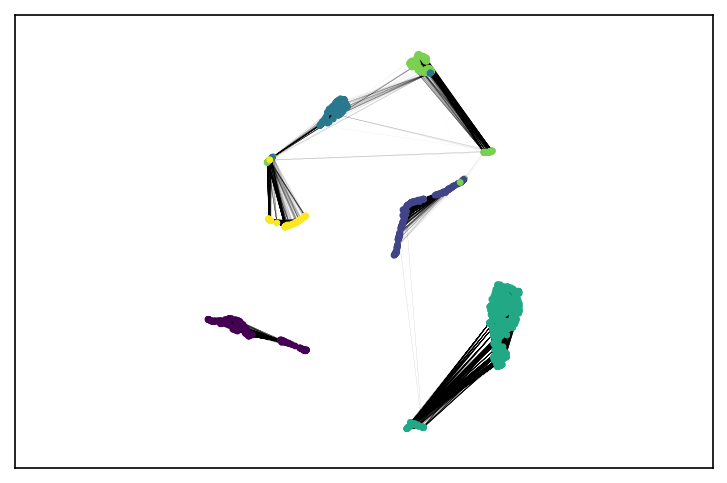

In [8]:
edgescale = 0.03

nx.draw_networkx(G, pos=pos, width=edgewidth_log*edgescale, with_labels=False, arrows=0, node_size=5, node_color=nodecolor, connectionstyle="arc3,rad=0.1")
plt.axis('equal')
plt.savefig(os.path.join(path, f"cell_graph.png"), dpi=1000)
plt.show()

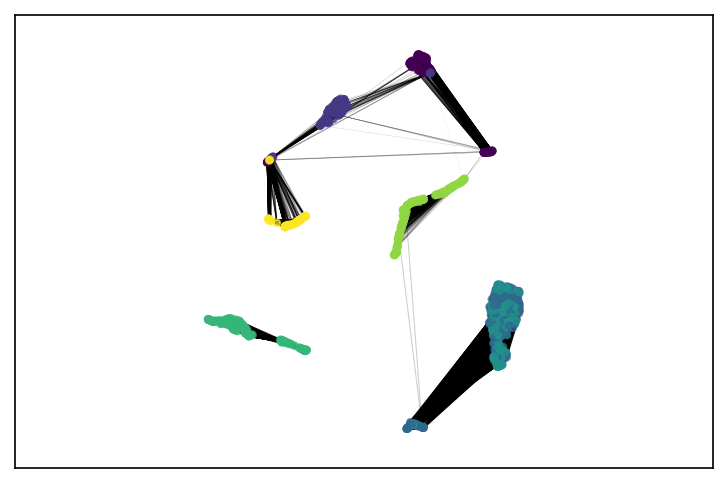

In [10]:
import matplotlib as mpl
nodecolor = [true_label[n] for n in G.nodes()]
edgescale = 0.5
size = len(set(c_label)) + 1
M = G.number_of_edges()
nodes = nx.draw_networkx_nodes(G, pos=pos, node_size=10, node_color=nodecolor,alpha=0.7)
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=1,
    arrowstyle="->",
    width=edgewidth_log*edgescale,
    arrows=0,
    connectionstyle="arc3,rad=0.1", alpha=0.2
)

ax = plt.gca()
# sm = plt.cm.ScalarMappable()
# sm.set_array([])
# plt.colorbar(sm, boundaries=np.arange(int(size)) - 0.5).set_ticks(np.arange(int(size)))

# ax.text(
#     0.80,
#     0.10,
#     "node color = cell type",
#     horizontalalignment="center",
#     transform=ax.transAxes)

# ax.text(
#     0.80,
#     0.06,
#     "edge size = similarity in embeddings",
#     horizontalalignment="center",
#     transform=ax.transAxes
# )
# # ax.set_axis_off()
# # plt.show()

plt.axis('equal')
plt.savefig(os.path.join(path, f"cell_graph.png"), dpi=1000)
plt.show()

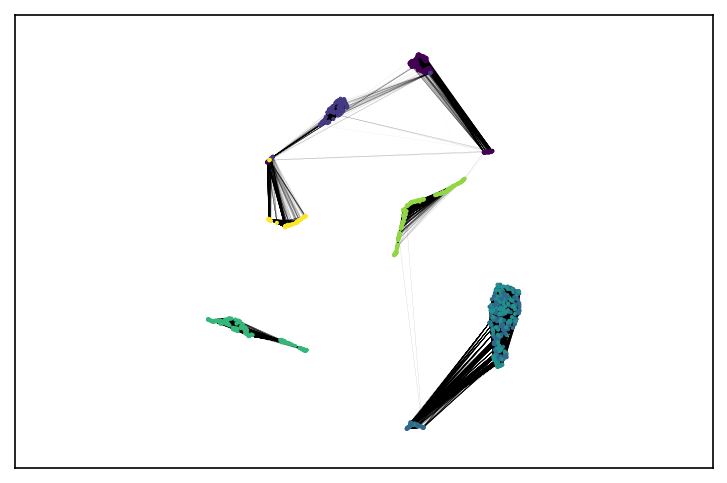

In [179]:
nodecolor = [true_label[n] for n in G.nodes()]

nx.draw_networkx(G, pos=pos, width=edgewidth_log*edgescale, with_labels=False, arrows=0, node_size=1, node_color=nodecolor, connectionstyle="arc3,rad=0.1")
plt.axis('equal')
plt.savefig(os.path.join(path, f"cell_graph_true.png"), dpi=1000)
plt.show()

# Sankey Diagram

In [1]:
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import numpy as np
import pandas as pd

from collections import Counter

In [2]:
file_list = [
    'outputs/outputs_v1.2.f.2.6/10241899_2.Chu_0.1_dropout/labels.csv',
    'outputs/datasets/2.Chu/top_cell_labels.csv',
    'outputs/inputs/bulk_2.Chu_0.1_dropout/labels.csv',
]

In [3]:
node_labels = []
node_links = []

for i, label_file in enumerate(file_list):
    c_label = pd.read_csv(label_file)
    labels = c_label.iloc[:,1]
    
    source_tmp = chr(65+i) + labels.astype(str)
    
    labels_tmp = pd.unique(source_tmp)
    labels_tmp.sort()
    labels_tmp = labels_tmp.tolist()

    node_labels.append(labels_tmp)
    node_links.append(source_tmp.tolist())


source = node_links[:-1]
source = [item for sublist in source for item in sublist]

target = node_links[1:]
target = [item for sublist in target for item in sublist]

node_labels = [item for sublist in node_labels for item in sublist]
node_dict = {y:x for x, y in enumerate(node_labels)}

links = [(s,t) for s, t in zip(source, target)]

link_count_dict = Counter(links)
links = list(link_count_dict.keys())
value = [link_count_dict[l] for l in links]
source = [s for s, t in links]
target = [t for s, t in links]

source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

# print(node_labels)
# print()
# print(source)
# print()
# print(target)
# print()
# print(value)

In [4]:

fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = node_labels
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = value
        ))])

plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=2100, 
     image_height=1400
)

# And shows the plot
fig.show()